In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import random
#import the data set required

In [19]:

# Create a SQLite connection
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [20]:


# Create the sales_summary table with an auto-incrementing id column
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales_summary (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')
print("DB CREATED...SUCCESSFULLY")

DB CREATED...SUCCESSFULLY


In [21]:

# Define a list of fruits to choose from
fruits = ['Apple', 'Banana', 'Cherry', 'Date', 'Elderberry', 'Fig', 'Grape', 'Honeydew', 'Kiwi', 'Lemon']

# Insert 100 rows of random data into the table
sales_data = []
for _ in range(100):
    product = random.choice(fruits)  # Randomly choose a fruit
    quantity = random.randint(1, 50)  # Random quantity between 1 and 50
    price = round(random.uniform(0.99, 9.99), 2)  # Random price between $0.99 and $9.99
    sales_data.append((product, quantity, price))

In [22]:

# Insert the random data into the table
cursor.executemany('''
INSERT INTO sales_summary (product, quantity, price) VALUES (?, ?, ?)
''', sales_data)

# Commit the changes and close the connection
conn.commit()

In [23]:

# Step 2: Query the sales data and display it

# 1. Total quantity sold for each fruit
query_qty = '''
SELECT product, SUM(quantity) AS total_qty
FROM sales_summary
GROUP BY product
'''

# Load the total quantity data into a pandas DataFrame
df_qty = pd.read_sql_query(query_qty, conn)

# 2. Average price per fruit
query_avg_price = '''
SELECT product, AVG(price) AS avg_price
FROM sales_summary
GROUP BY product
'''

# Load the average price data into a pandas DataFrame
df_avg_price = pd.read_sql_query(query_avg_price, conn)

# 3. Total revenue per fruit
query_revenue = '''
SELECT product, SUM(quantity * price) AS revenue
FROM sales_summary
GROUP BY product
'''

# Load the revenue data into a pandas DataFrame
df_revenue = pd.read_sql_query(query_revenue, conn)

# Close the connection
conn.close()


In [24]:

# Print the results
print("Total Quantity Sold per Fruit:\n", df_qty)
print("\nAverage Price per Fruit:\n", df_avg_price)
print("\nTotal Revenue per Fruit:\n", df_revenue)

Total Quantity Sold per Fruit:
       product  total_qty
0       Apple       1321
1      Banana       1100
2      Cherry       1605
3        Date        900
4  Elderberry       1264
5         Fig       1149
6       Grape       1342
7    Honeydew       1149
8        Kiwi       1279
9       Lemon       1449

Average Price per Fruit:
       product  avg_price
0       Apple   6.398621
1      Banana   5.118182
2      Cherry   5.684127
3        Date   6.447941
4  Elderberry   5.260816
5         Fig   5.317400
6       Grape   5.557407
7    Honeydew   5.666667
8        Kiwi   5.091346
9       Lemon   5.386111

Total Revenue per Fruit:
       product  revenue
0       Apple  7957.74
1      Banana  5496.07
2      Cherry  9156.98
3        Date  5965.54
4  Elderberry  6678.83
5         Fig  5802.32
6       Grape  7639.03
7    Honeydew  6699.30
8        Kiwi  6131.84
9       Lemon  8306.25


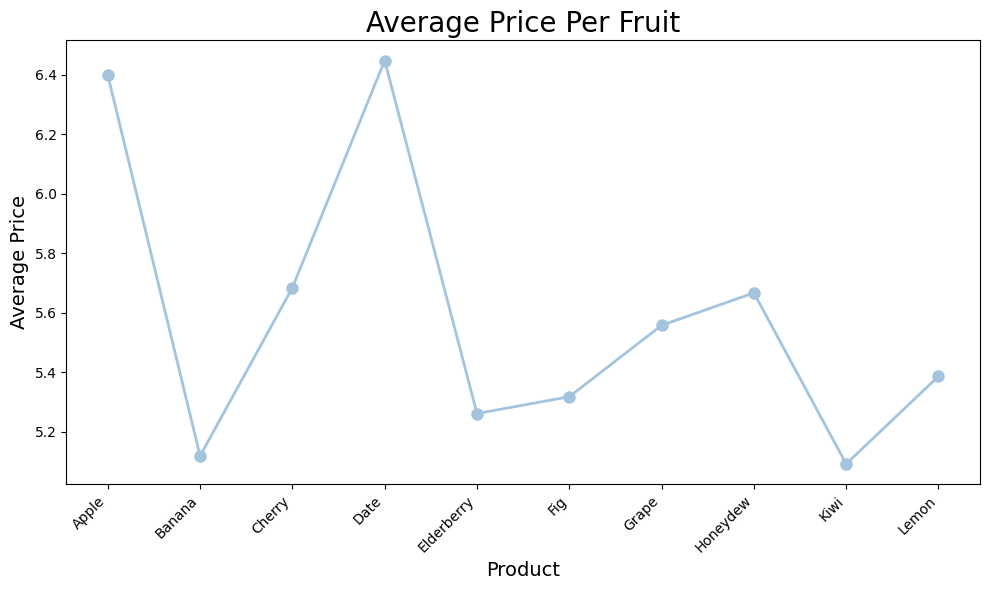

In [25]:
import matplotlib.pyplot as plt

# Create a line chart for average price per product with pastel color
plt.figure(figsize=(10, 6))
plt.plot(df_avg_price['product'], df_avg_price['avg_price'], marker='o', color='#A3C4DC', linestyle='-', linewidth=2, markersize=8)

# Add labels and title
plt.title('Average Price Per Fruit', fontsize=20)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Average Price', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.savefig("average_price_line_chart_pastel.png")
plt.show()


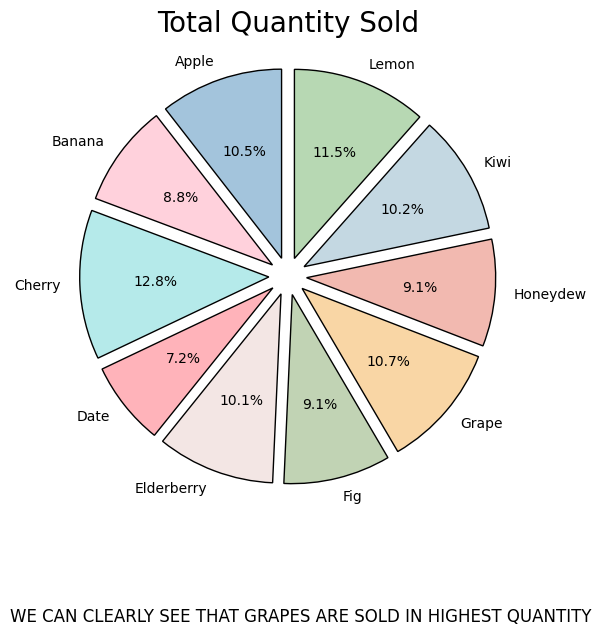

In [26]:
import matplotlib.pyplot as plt

# Example data from df_qty
# Replace this with your actual df_qty['product'] and df_qty['total_qty']
labels = df_qty['product']
sizes = df_qty['total_qty']

# Exploding all slices by a fraction of the radius (e.g., 0.1 for each)
explode = [0.1] * len(labels)  # All slices will be exploded

# Define a list of 10 pastel colors
pastel_colors = [
    '#A3C4DC', '#FFD1DC', '#B5EAEA', '#FFB3BA', '#F3E6E4',
    '#C1D3B4', '#F9D6A5', '#F2B9B0', '#C4D8E2', '#B7D8B3'
]

# Create pie chart with explosion effect
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    explode=explode,  # Apply explosion to all slices
    colors=pastel_colors[:len(labels)]  # Apply pastel colors (up to 10 slices)
)

# Title with increased font size
plt.title('Total Quantity Sold', fontsize=20)

# Add descriptive text using figtext
plt.figtext(0.5, -0.1, 'WE CAN CLEARLY SEE THAT GRAPES ARE SOLD IN HIGHEST QUANTITY', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig("quantity_chart.png")
plt.show()


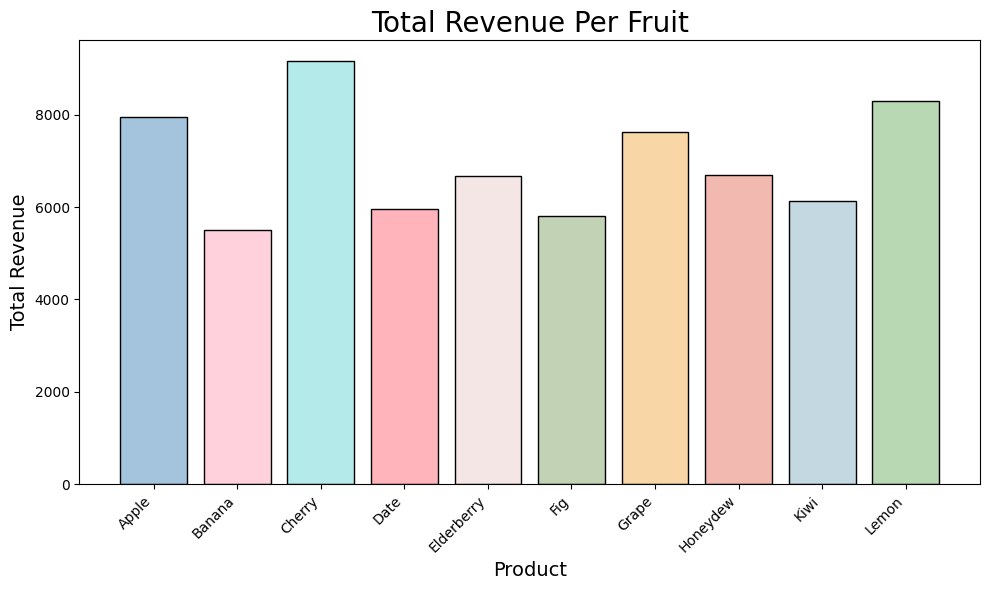

In [27]:
import matplotlib.pyplot as plt

# Example data from df_revenue
# Replace this with your actual df_revenue['product'] and df_revenue['revenue']
labels = df_revenue['product']
revenue = df_revenue['revenue']

# Define pastel colors
pastel_colors = [
    '#A3C4DC', '#FFD1DC', '#B5EAEA', '#FFB3BA', '#F3E6E4',
    '#C1D3B4', '#F9D6A5', '#F2B9B0', '#C4D8E2', '#B7D8B3'
]

# Create a bar chart for total revenue per product with pastel colors and black borders
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, revenue, color=pastel_colors[:len(labels)], edgecolor='black')


# Add labels and title
plt.title('Total Revenue Per Fruit', fontsize=20)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.savefig("total_revenue_chart_pastel.png")
plt.show()
